<a href="https://colab.research.google.com/github/hasanm08/ai-notebooks/blob/main/NNDL_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fetch Dataset

In [ ]:
!gdown --id 1KibXPRCoI2ywcZyeHjr9p5rUCwEm-G7n

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KibXPRCoI2ywcZyeHjr9p5rUCwEm-G7n
To: /content/Dataset.zip
100% 7.97M/7.97M [00:00<00:00, 117MB/s]


In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/0/
  inflating: Dataset/0/0CdBlhLw.png  
  inflating: Dataset/0/10014.jpg     
  inflating: Dataset/0/1058.jpg      
  inflating: Dataset/0/10679.jpg     
  inflating: Dataset/0/10825.jpg     
  inflating: Dataset/0/10892.jpg     
  inflating: Dataset/0/10941.jpg     
  inflating: Dataset/0/10970.jpg     
  inflating: Dataset/0/1199.jpg      
  inflating: Dataset/0/12488.jpg     
  inflating: Dataset/0/12580.jpg     
  inflating: Dataset/0/12643.jpg     
  inflating: Dataset/0/12703.jpg     
  inflating: Dataset/0/12710.jpg     
  inflating: Dataset/0/12752.jpg     
  inflating: Dataset/0/12825.jpg     
  inflating: Dataset/0/1303.jpg      
  inflating: Dataset/0/13230.jpg     
  inflating: Dataset/0/13609.jpg     
  inflating: Dataset/0/13689.jpg     
  inflating: Dataset/0/13776.jpg     
  inflating: Dataset/0/13793.jpg     
  inflating: Dataset/0/13840.jpg     
  inflating: Dataset/0/14171.jpg     
  inflating: Dataset/0/14651.jpg 

#Split Train and test

In [ ]:
import glob
import cv2
import random
import numpy as np

from PIL import Image
res = []

for file in glob.glob('/content/Dataset/**/*/*', recursive=True):
    # img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
    img = Image.open(file).convert('L').resize((64,64))
    img = np.array(img)
    res.append((file.split('/')[3], img))
    # print(file.split('/'))
train = []
test = []
for _class in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z']:
    tmp = []
    for item in res:
        if(item[0] == _class):
            tmp.append(item)
    print(_class, len(tmp))
    random.seed(8)
    random.shuffle(tmp)
    index = int(len(tmp)*0.8)
    tmp_train = tmp[:index]
    tmp_test = tmp[index:]
    train.extend(tmp_train)
    test.extend(tmp_test)
train = np.array(train, dtype=tuple)
test = np.array(test, dtype=tuple)
print(train.shape)
print(test.shape)


0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100
add 100
dec 100
div 100
eq 100
mul 100
sub 100
x 100
y 100
z 100
(1520, 2)
(380, 2)


In [ ]:
X_train=np.array([item[1]/255 for item in train])
X_test=np.array([item[1]/255 for item in test])
y_train=np.array([item[0] for item in train])
y_test=np.array([item[0] for item in test])
print(X_test.shape)
print(y_test.shape)

(380, 64, 64)
(380,)


Training data shape :  (1520, 64, 64) (1520,)
Testing data shape :  (380, 64, 64) (380,)
Total number of outputs :  19
Output classes :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'add' 'dec' 'div' 'eq' 'mul'
 'sub' 'x' 'y' 'z']


Text(0.5, 1.0, 'Ground Truth : 0')

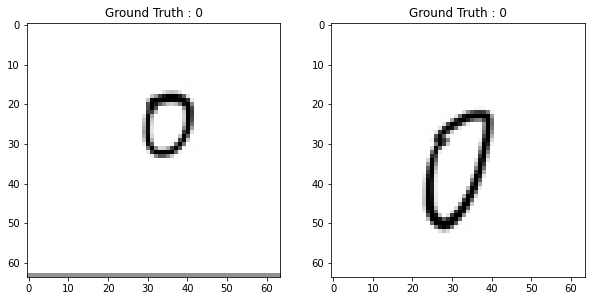

In [ ]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
dim_data = np.prod(X_train.shape[1:])
train_data = X_train.reshape(X_train.shape[0], dim_data)
test_data = X_test.reshape(X_test.shape[0], dim_data)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
test_labels_one_hot = to_categorical(y_test)
train_labels_one_hot = to_categorical(y_train)

#SLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=500,hidden_layer_sizes=(300),alpha=3).fit(train_data, y_train)
clf.predict_proba(test_data)

yp=clf.predict(test_data)
print("recall is : ",recall_score(y_test,yp,average='macro'))
print("precision is : ",precision_score(y_test,yp,average='macro'))

clf.score(test_data, y_test)

recall is :  0.39999999999999997
precision is :  0.5328085818261514


0.4

In [ ]:
print(clf.score(test_data, y_test))

0.4


In [ ]:
print(clf.score(train_data, y_train))

0.5782894736842106


##Add Noise 

In [ ]:
import random
import cv2

def add_noise(img):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300, 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to white
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between 300 and 10000
	number_of_pixels = random.randint(300 , 10000)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to black
		img[y_coord][x_coord] = 0
		
	return img

Text(0.5, 1.0, 'defult ')

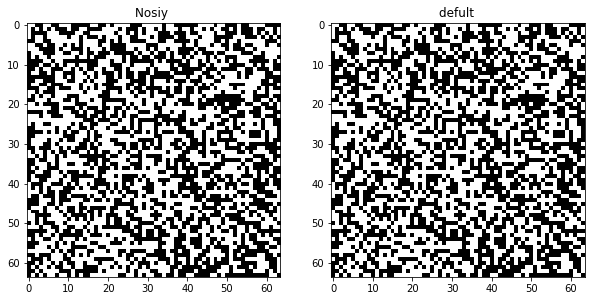

In [ ]:
noise=add_noise(X_train[1])
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(noise, cmap='gray')
plt.title("Nosiy ")
plt.subplot(122)
plt.imshow(X_train[1], cmap='gray')
plt.title("defult ")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
def fit_with_noise(X_train,X_test,y_train,y_test,fraction):
  noised_X=[]
  for item in X_train[:int(len(X_train))]:
    noised_X.append(add_noise(item))
  for item in X_train[int(len(X_train)):]:
    noised_X.append(item)
  dim_data = np.prod(X_train.shape[1:])
  train_data = X_train.reshape(X_train.shape[0], dim_data)
  test_data = X_test.reshape(X_test.shape[0], dim_data)
  train_data = train_data.astype('float32')
  test_data = test_data.astype('float32')
  test_labels_one_hot = to_categorical(y_test)
  train_labels_one_hot = to_categorical(y_train)
  clf = MLPClassifier(random_state=1, max_iter=500,hidden_layer_sizes=(300),alpha=3).fit(train_data, y_train)
  clf.predict_proba(test_data)

  yp=clf.predict(test_data)
  print("recall is : ",recall_score(y_test,yp,average='macro'))
  print("precision is : ",precision_score(y_test,yp,average='macro'))

  print(clf.score(test_data, y_test))
  print(clf.score(train_data, y_train))

In [ ]:
fit_with_noise(X_train,X_test,y_train,y_test,0.1)

recall is :  0.05263157894736842
precision is :  0.002770083102493075
0.05263157894736842
0.5296052631578947


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fit_with_noise(X_train,X_test,y_train,y_test,0.2)

recall is :  0.05263157894736842
precision is :  0.002770083102493075
0.05263157894736842
0.3980263157894737


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SOM & LVQ

In [ ]:
!pip install sklearn-som

In [ ]:
from sklearn_som.som import SOM

som = SOM(m=5, n=4, dim=4096)
Som_train=som.fit(train_data,epochs=30)
Som_train=som.transform(train_data)
Som_test=som.transform(test_data)

In [ ]:
# [np.argmax(item) for item in Som_train]

In [ ]:
import math
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

class LVQ :
	
	# Function here computes the winning vector
	# by Euclidean distance
	def winner( self, weights, sample ) :
		
		D0 = 0
		D1 = 0
		
		for i in range( len( sample ) ) :
			D0 = D0 + math.pow( ( sample[i] - weights[0][i] ), 2 )
			D1 = D1 + math.pow( ( sample[i] - weights[1][i] ), 2 )
			
			if D0 > D1 :
				return 0
			else :
				return 1

	# Function here updates the winning vector	
	def update( self, weights, sample, J, alpha ) :
		for i in range(len(weights)) :
			weights[J][i] = weights[J][i] + alpha * ( sample[i] - weights[J][i] )




In [ ]:

# Training Samples ( m, n ) with their class vector
X = Som_train.tolist()

Y = y_train.tolist()
m, n = len( X ), len( X[0] )

# weight initialization ( n, c )
weights = []
weights.append( X.pop( 0 ) )
weights.append( X.pop( 1 ) )

# Samples used in weight initialization will
# not use in training
m = m - 2

# training
ob = LVQ()
epochs = 300
alpha = 0.99

for i in range( epochs ) :
  for j in range( m ) :
    
    # Sample selection
    T = X[j]
    
    # Compute winner
    J = ob.winner( weights, T )
  
    # Update weights
    ob.update( weights, T, J, alpha )
    



# classify new input sample
# Test
yp=[]

for item in Som_test:
  yp.append(ob.winner( weights, item ))
print("recall is : ",recall_score(y_test,yp,average='macro'))
print("precision is : ",precision_score(y_test,yp,average='macro'))
print("accuracy_score is : ",accuracy_score(y_test,yp))

recall is :  0.08421052631578947
precision is :  0.00874847546674172
accuracy_score is :  0.08421052631578947


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def som_with_noise(X_train,X_test,y_train,y_test,fraction):
  noised_X=[]
  for item in X_train[:int(len(X_train))]:
    noised_X.append(add_noise(item))
  for item in X_train[int(len(X_train)):]:
    noised_X.append(item)
  dim_data = np.prod(X_train.shape[1:])
  train_data = X_train.reshape(X_train.shape[0], dim_data)
  test_data = X_test.reshape(X_test.shape[0], dim_data)
  train_data = train_data.astype('float32')
  test_data = test_data.astype('float32')
  test_labels_one_hot = to_categorical(y_test)
  train_labels_one_hot = to_categorical(y_train)

  som = SOM(m=5, n=4, dim=4096)
  Som_train=som.fit(train_data,epochs=30)
  Som_train=som.transform(train_data)
  Som_test=som.transform(test_data)
  m, n = len( X ), len( X[0] )

  # weight initialization ( n, c )
  weights = []
  weights.append( X.pop( 0 ) )
  weights.append( X.pop( 1 ) )

  # Samples used in weight initialization will
  # not use in training
  m = m - 2

  # training
  ob = LVQ()
  epochs = 300
  alpha = 0.99

  for i in range( epochs ) :
    for j in range( m ) :
      
      # Sample selection
      T = X[j]
      
      # Compute winner
      J = ob.winner( weights, T )
    
      # Update weights
      ob.update( weights, T, J, alpha )
      



  # classify new input sample
  # Test
  yp=[]

  for item in Som_test:
    yp.append(ob.winner( weights, item ))
  print("recall is : ",recall_score(y_test,yp,average='macro'))
  print("precision is : ",precision_score(y_test,yp,average='macro'))
  print("accuracy_score is : ",accuracy_score(y_test,yp))

In [ ]:
som_with_noise(X_train,X_test,y_train,y_test,0.1)

recall is :  0.05263157894736842
precision is :  0.002770083102493075
accuracy_score is :  0.05263157894736842


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
som_with_noise(X_train,X_test,y_train,y_test,0.2)

recall is :  0.05263157894736842
precision is :  0.002770083102493075
accuracy_score is :  0.05263157894736842


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
